# Using CellTypist for cell type classification
This notebook is a modified version of the cell type classification notebook from CellTypist. This notebook outlines all the steps to classify T-cells found in the PBMC samples from individuals with epidemic and endemic KS

## Install CellTypist

In [ ]:
!pip install celltypist

  Using cached celltypist-1.2.0-py3-none-any.whl (5.3 MB)


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import celltypist
from celltypist import models
import celltypist
from celltypist import models
import pandas as pd
from collections import OrderedDict


## Download a scRNA-seq dataset of PBMC samples from individuals with epidemic and endemic KS

In [ ]:
adata_all = sc.read('pbmc_tcels_61763.h5ad')

The expression matrix (`adata_all.X`) is pre-processed (and required) as log1p normalised expression to 10,000 counts per cell (this matrix can be alternatively stashed in `.raw.X`).

In [ ]:
adata_all.raw.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

Some pre-assigned cell type labels are also in the data, which will be compared to the predicted labels from CellTypist later.

## Assign cell type labels using a CellTypist built-in model
In this section, we show the procedure of transferring cell type labels from built-in models to the query dataset.

Download the latest CellTypist models.

In [9]:
# Enabling `force_update = True` will overwrite existing (old) models.
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in /home/sravisha/.celltypist/data/models
💾 Downloading model [1/54]: Immune_All_Low.pkl
💾 Downloading model [2/54]: Immune_All_High.pkl
💾 Downloading model [3/54]: Adult_COVID19_PBMC.pkl
💾 Downloading model [4/54]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [5/54]: Adult_Human_MTG.pkl
💾 Downloading model [6/54]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [7/54]: Adult_Human_PrefrontalCortex.pkl
💾 Downloading model [8/54]: Adult_Human_Skin.pkl
💾 Downloading model [9/54]: Adult_Human_Vascular.pkl
💾 Downloading model [10/54]: Adult_Mouse_Gut.pkl
💾 Downloading model [11/54]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [12/54]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [13/54]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [14/54]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [15/54]: COVID19_HumanChallenge_Bloo

All models are stored in `models.models_path`.

Get an overview of the models and what they represent.

In [11]:
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_COVID19_PBMC.pkl,peripheral blood mononuclear cell types from C...
3,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
4,Adult_Human_MTG.pkl,cell types and subtypes (10x-based) from the a...
5,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
6,Adult_Human_PrefrontalCortex.pkl,cell types and subtypes from the adult human d...
7,Adult_Human_Skin.pkl,cell types from human healthy adult skin
8,Adult_Human_Vascular.pkl,vascular populations combined from multiple ad...
9,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...


Choose the model you want to employ, for example, the model with all tissues combined containing low-hierarchy (high-resolution) immune cell types/subtypes.

In [12]:
# Indeed, the `model` argument defaults to `Immune_All_Low.pkl`.
model = models.Model.load(model = 'Immune_All_Low.pkl')

Transfer cell type labels from this model to the query dataset using [celltypist.annotate](https://celltypist.readthedocs.io/en/latest/celltypist.annotate.html).

In [ ]:
sc.pp.pca(adata_all)
predictions = celltypist.annotate(adata_all, model = 'Immune_All_Low.pkl', majority_voting = True)

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 61763 cells and 24274 genes
🔗 Matching reference genes in the model
🧬 5704 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


In [16]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
008_216_V01_AAACCTGAGAGCTATA-1,Tem/Temra cytotoxic T cells,489,Tem/Temra cytotoxic T cells
008_216_V01_AAACCTGAGGCTCATT-1,Tem/Temra cytotoxic T cells,126,Tem/Temra cytotoxic T cells
008_216_V01_AAACCTGAGGTACTCT-1,Tem/Temra cytotoxic T cells,296,Tem/Trm cytotoxic T cells
008_216_V01_AAACCTGCAAGGTGTG-1,Tem/Trm cytotoxic T cells,285,Tem/Trm cytotoxic T cells
008_216_V01_AAACCTGGTGTTCTTT-1,Tem/Trm cytotoxic T cells,430,Tem/Trm cytotoxic T cells
...,...,...,...
008_256_V01_TTTGTCACACTTGGAT-1,Tcm/Naive helper T cells,324,Tem/Effector helper T cells
008_256_V01_TTTGTCACATACTCTT-1,Tem/Trm cytotoxic T cells,210,Tem/Trm cytotoxic T cells
008_256_V01_TTTGTCAGTCGCATAT-1,Tem/Temra cytotoxic T cells,170,Tem/Temra cytotoxic T cells
008_256_V01_TTTGTCATCATTCACT-1,Tem/Trm cytotoxic T cells,310,Tcm/Naive helper T cells


Transform the prediction result into an `AnnData`.

In [17]:
# Get an `AnnData` with predicted labels embedded into the cell metadata columns.
adata = predictions.to_adata()

In [18]:
adata.obs.columns

Index(['orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample',
       'Barcode', 'sum', 'detected', 'subsets_Mito_sum',
       'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'outlier',
       'discard', 'sizeFactor', 'label', 'scDblFinder.cluster',
       'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted',
       'scDblFinder.difficulty', 'scDblFinder.cxds_score',
       'scDblFinder.mostLikelyOrigin', 'scDblFinder.originAmbiguous',
       'nCount_RNA', 'nFeature_RNA', 'barcode', 'CTgene', 'CTnt', 'CTaa',
       'CTstrict', 'Frequency', 'cloneType', 'integrated_snn_res.0.5',
       'seurat_clusters', 'cohort', 'is_tcell', 'ident', 'RNA_snn_res.0.5',
       'nCount_SCT', 'nFeature_SCT', 'predicted.celltype.l1.score',
       'predicted.celltype.l1', 'predicted.celltype.l2.score',
       'predicted.celltype.l2', 'celltype', 'predicted_labels',
       'over_clustering', 'majority_voting', 'conf_score'],
      dtype='object')

In [19]:
# If the UMAP or any cell embeddings are already available in the `AnnData`, skip this command.
sc.tl.umap(adata)
sc.tl.tsne(adata)

Visualise the prediction results.

... storing 'orig.ident' as categorical
... storing 'Sample' as categorical
... storing 'Barcode' as categorical
... storing 'label' as categorical
... storing 'scDblFinder.class' as categorical
... storing 'scDblFinder.mostLikelyOrigin' as categorical
... storing 'CTgene' as categorical
... storing 'CTnt' as categorical
... storing 'CTaa' as categorical
... storing 'CTstrict' as categorical
... storing 'cloneType' as categorical
... storing 'cohort' as categorical
... storing 'is_tcell' as categorical
... storing 'predicted.celltype.l1' as categorical
... storing 'predicted.celltype.l2' as categorical
... storing 'celltype' as categorical


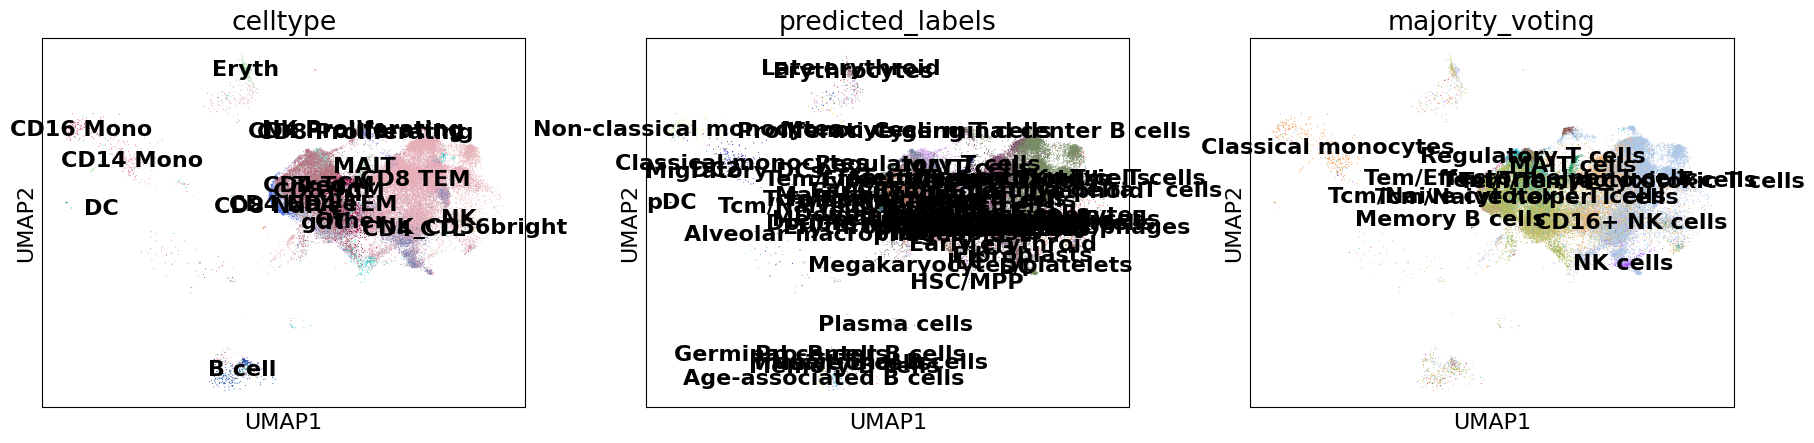

In [27]:
sc.pl.umap(adata, color = ['celltype', 'predicted_labels', 'majority_voting'], legend_loc = 'on data')

In [ ]:
clustered_unknowns = pd.read_csv("kstme_clustered_unknowns.csv")['junction_aa'].unique().tolist()

In [21]:
adata.obs[['tra', 'trb']] = adata.obs['CTaa'].str.split('_', expand = True)


In [25]:
adata.obs['clustered_unknowns'] = adata.obs['trb'].isin(clustered_unknowns)
adata.obs.loc[adata.obs['clustered_unknowns']]['CTaa'].unique()

['CAVRDNDGYGQNFVF_CASSQDLGQGGDTQYF', 'CAVQADGSWGKLQF_CASSLAGGPSTDTQYF', 'CALSAPDNYGQNFVF_CASSQPSGGTGELFF', 'CAASGNVYSGGGADGLTF_CATSLGTGITDTQYF', 'CAAPNGGSQGNLIF_CASSDLSSYEQYF', ..., 'CAYRSYGGATNKLIF_CASSFSGAYEQYV', 'CALSDKNTGFQKLVF_CASSLAGDYGYTF', 'CAMREGSHAGGTSYGKLTF_CASSVGGGTYEQYF', 'CAVQARETSGSRLTF_CASTDRNYGYTF', 'CAVNGNDYKLSF_CASSAGPSTEAFF']
Length: 4283
Categories (31576, object): ['CAAAADRGSTLGRLYF_CASSLGGTISDEQYF', 'CAAAASGGGATNKLIF_CASTWTGKVGYTF', 'CAAAASGNTPLVF_CASSYRTSGTGELFF', 'CAAADLNFGNEKLTF_CASSVAGSPEQYF', ..., 'CWTQGGSEKLVF_CASGGLGFTDTQYF', 'CYGGATNKLIF_CASSQVKRGGNTIYF', 'CYGGSQGNLIF_CASSLERVQNYYNSPLHF', 'CYTDNFGNEKLTF_CASKLEGGSYNEQFF']

In [33]:
value_counts = predictions.predicted_labels['majority_voting'].value_counts()
value_counts_two = adata.obs.loc[adata.obs['clustered_unknowns']]['majority_voting'].value_counts()

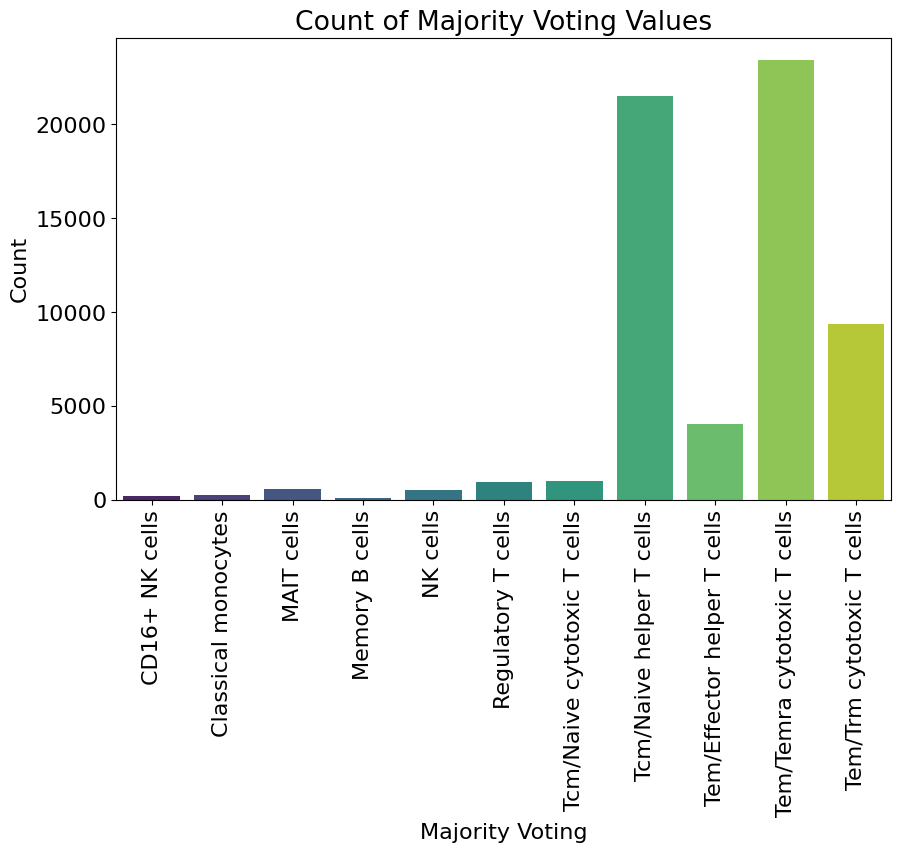

In [34]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel('Majority Voting')
plt.ylabel('Count')
plt.title('Count of Majority Voting Values')
plt.xticks(rotation=90)  # Rotate labels if necessary
plt.show()

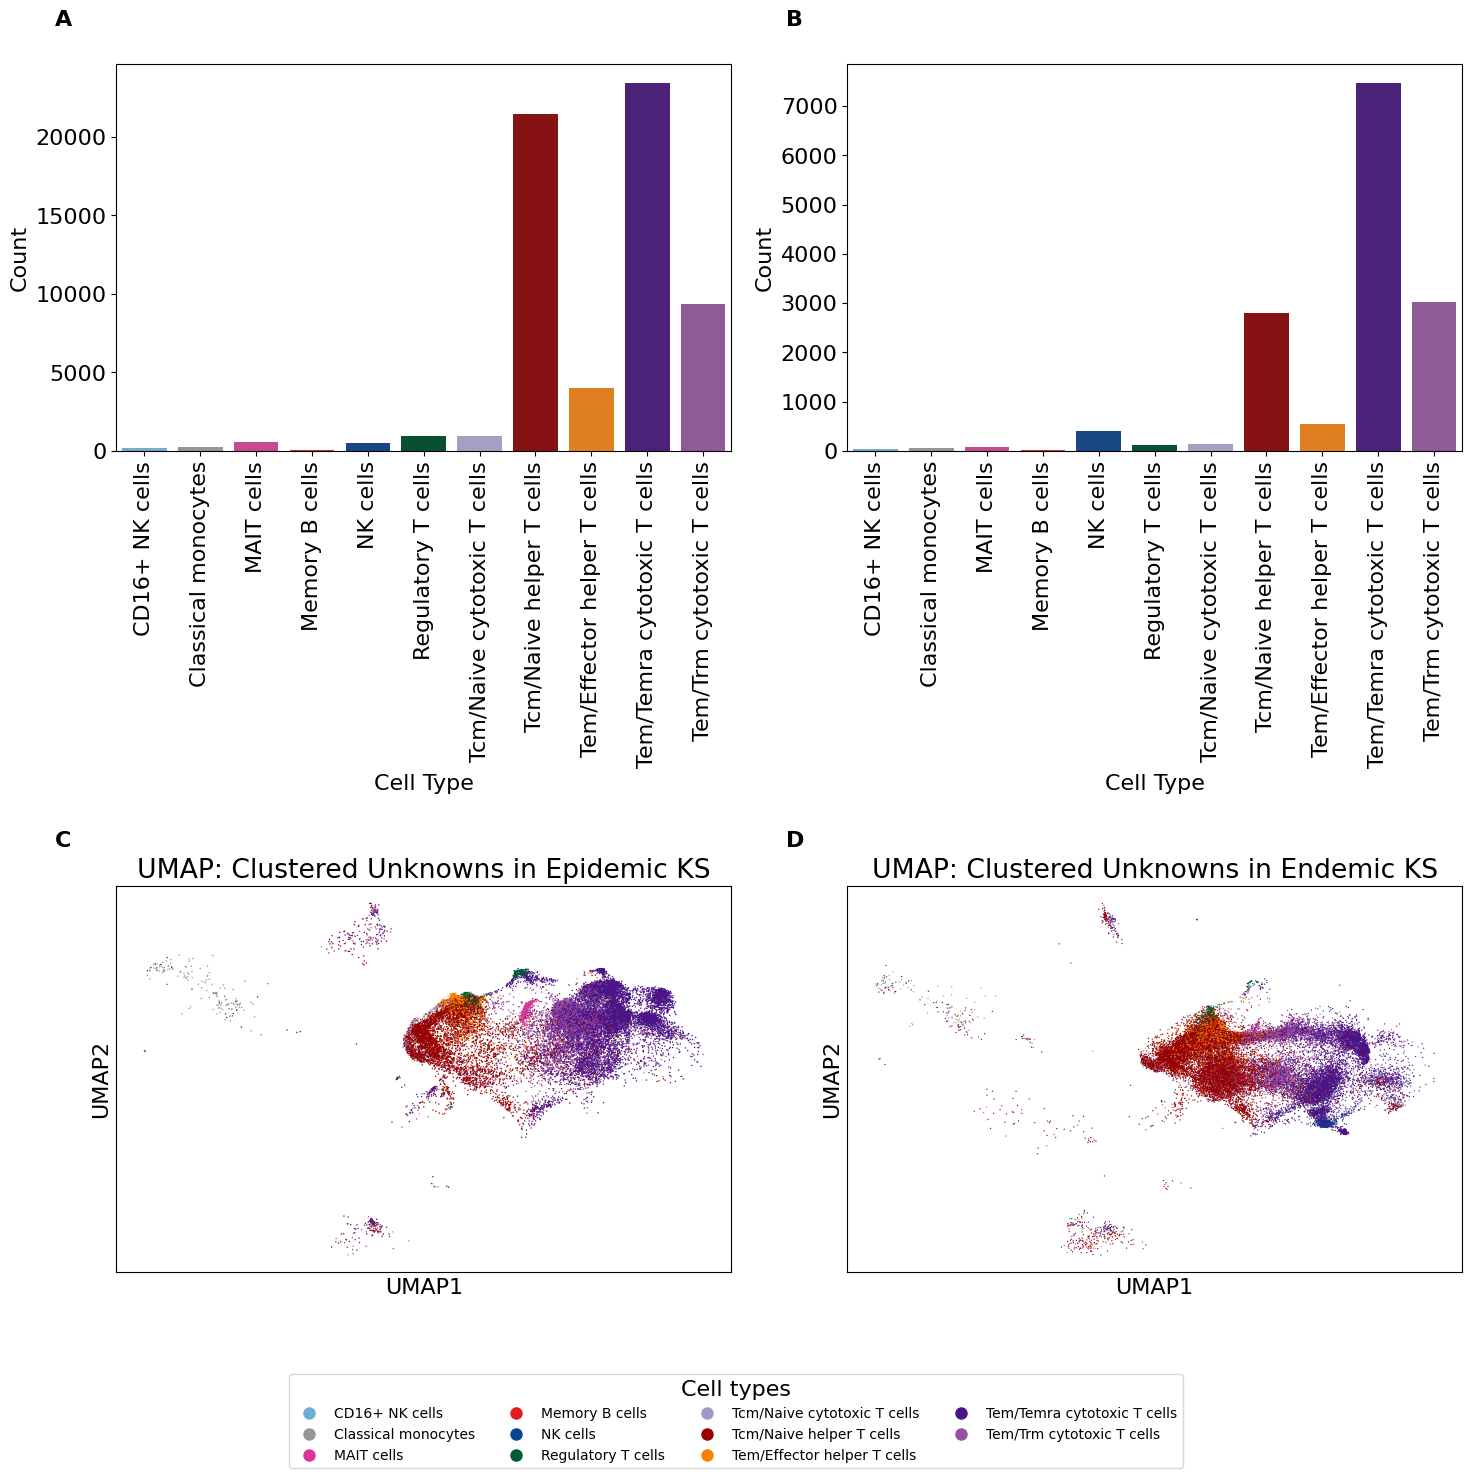

In [ ]:
# Define a discrete palette for 11 categories
colors = ['#4a1486', '#984ea3', '#990000', '#ff7f00', '#9e9ac8', '#005a32', 
          '#dd3497', '#084594', '#969696', '#6baed6', '#e41a1c']

palette = OrderedDict(zip(adata.obs['majority_voting'].unique().tolist(), colors))
palette_values = list(palette.values())

# Create a grid of 2x2 plots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Add subplot labels
subplot_labels = ['A', 'B', 'C', 'D']

# Plot 1: Bar graph for value_counts
sns.barplot(ax=axs[0, 0], x=value_counts.index, y=value_counts.values, palette=palette)
axs[0, 0].set_xlabel('Cell Type')
axs[0, 0].set_ylabel('Count')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].text(-0.1, 1.1, 'A', transform=axs[0, 0].transAxes, fontsize=16, fontweight='bold')

# Plot 2: Bar graph for value_counts_two
sns.barplot(ax=axs[0, 1], x=value_counts_two.index, y=value_counts_two.values, palette=palette)
axs[0, 1].set_xlabel('Cell Type')
axs[0, 1].set_ylabel('Count')
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].text(-0.1, 1.1, 'B', transform=axs[0, 1].transAxes, fontsize=16, fontweight='bold')

# Plot 3: UMAP for Epidemic KS
sc.pl.umap(adata[adata.obs['cohort'] == "Epidemic KS"], color=['majority_voting'], palette=palette, ax=axs[1, 0], show=False, legend_loc='none')
axs[1, 0].set_title('UMAP: Clustered Unknowns in Epidemic KS')
axs[1, 0].text(-0.1, 1.1, 'C', transform=axs[1, 0].transAxes, fontsize=16, fontweight='bold')

# Plot 4: UMAP for Endemic KS
sc.pl.umap(adata[adata.obs['cohort'] == "Endemic KS"], color=['majority_voting'], palette=palette, ax=axs[1, 1], show=False, legend_loc='none')
axs[1, 1].set_title('UMAP: Clustered Unknowns in Endemic KS')
axs[1, 1].text(-0.1, 1.1, 'D', transform=axs[1, 1].transAxes, fontsize=16, fontweight='bold')

# Plot 4: UMAP for Endemic KS
sc.pl.umap(adata, color=['GZMB'], ax=axs[2, 0], show=False, legend_loc='none')
axs[2, 1].set_title('UMAP: Clustered Unknowns in Endemic KS')
axs[1, 1].text(-0.1, 1.1, 'D', transform=axs[1, 1].transAxes, fontsize=16, fontweight='bold')

# Plot 4: UMAP for Endemic KS
sc.pl.umap(adata, color=['majority_voting'], palette=palette, ax=axs[1, 1], show=False, legend_loc='none')
axs[1, 1].set_title('UMAP: Clustered Unknowns in Endemic KS')
axs[1, 1].text(-0.1, 1.1, 'D', transform=axs[1, 1].transAxes, fontsize=16, fontweight='bold')

# Plot 4: UMAP for Endemic KS
sc.pl.umap(adata[adata.obs['cohort'] == "Endemic KS"], color=['majority_voting'], palette=palette, ax=axs[1, 1], show=False, legend_loc='none')
axs[1, 1].set_title('UMAP: Clustered Unknowns in Endemic KS')
axs[1, 1].text(-0.1, 1.1, 'D', transform=axs[1, 1].transAxes, fontsize=16, fontweight='bold')
# Create a single legend
legend_labels = adata.obs['majority_voting'].cat.categories  # Assuming it's a categorical variable
legend_patches = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[label], markersize=10, label=label)
    for label in legend_labels
]
fig.legend(handles=legend_patches, loc='lower center', ncol=4, fontsize=10, title="Cell types")

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Display the grid of plots

plt.show()




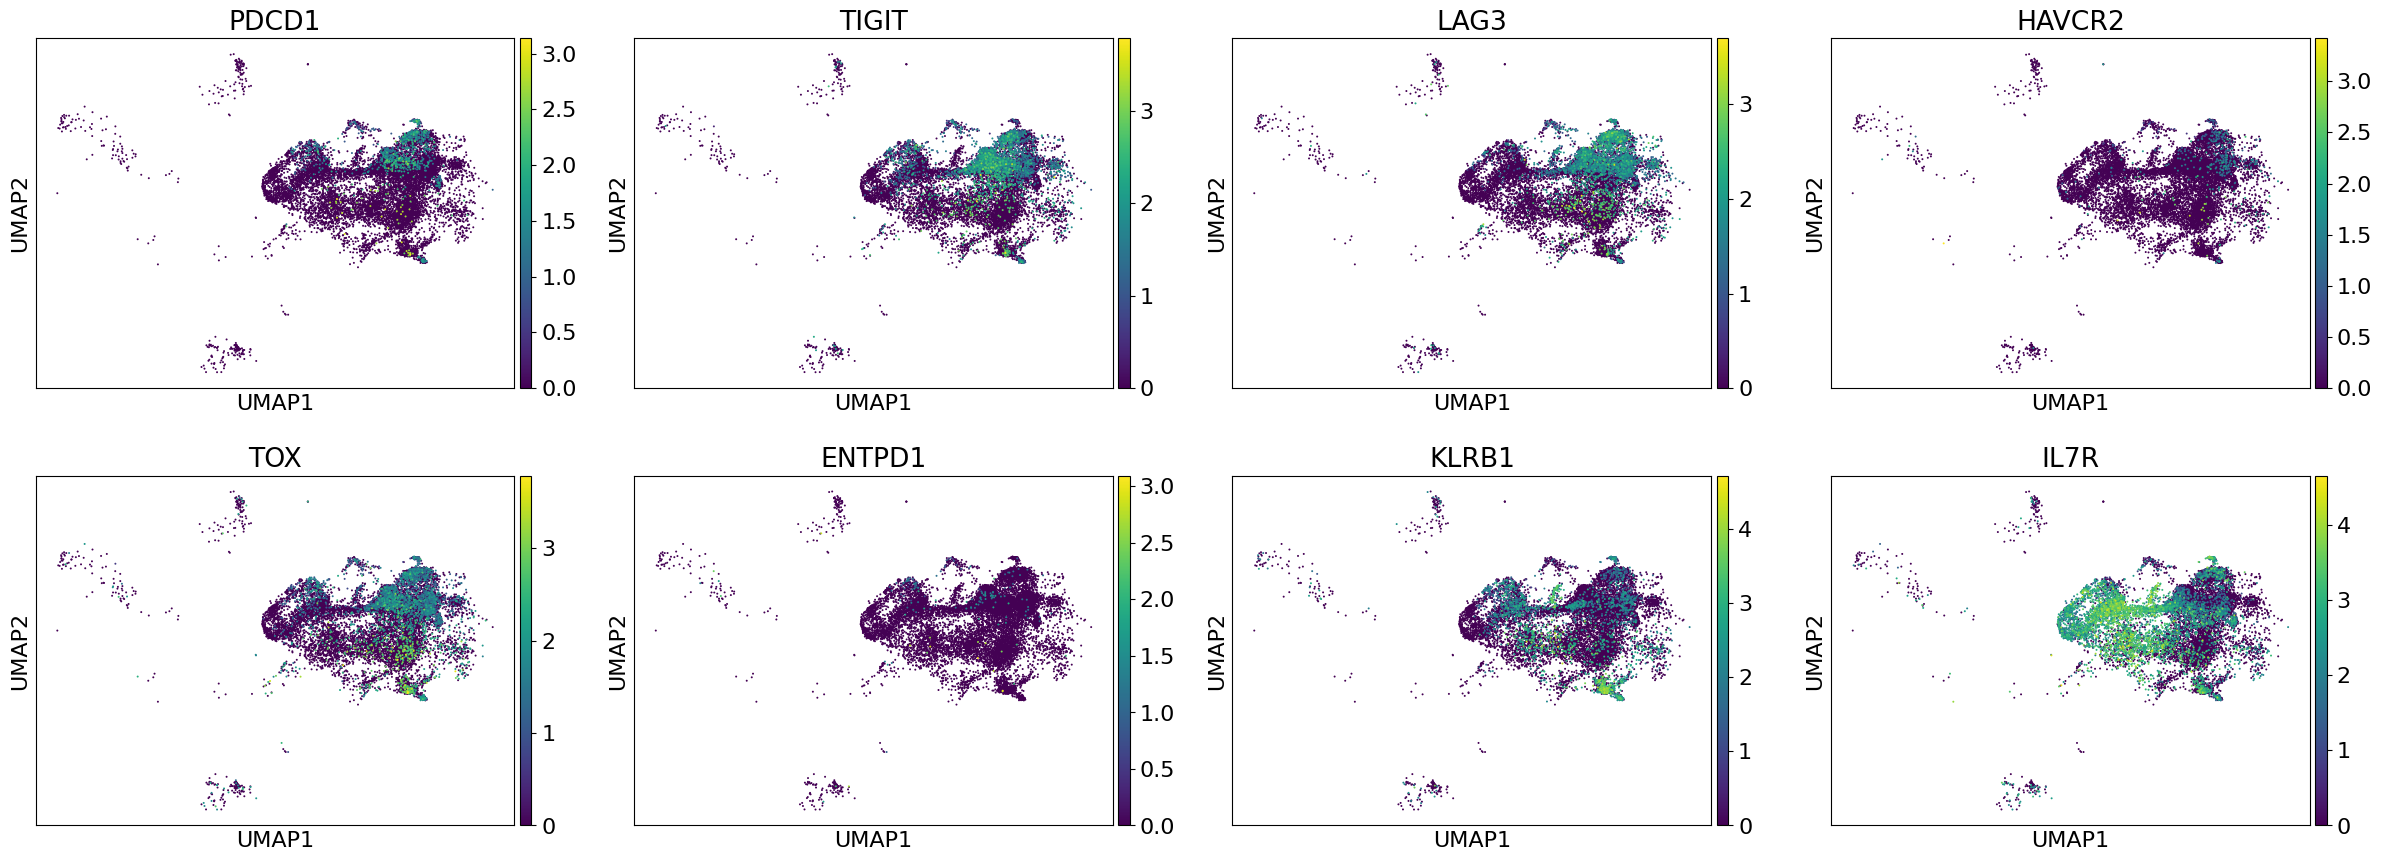

In [140]:
sc.pl.umap(adata[adata.obs['clustered_unknowns']], sort_order=True, color=[''PDCD1', 'TIGIT', 'LAG3', 'HAVCR2', 'TOX', 'ENTPD1', 'KLRB1',  'IL7R'],  show=False, legend_loc='none', ncols=4)
plt.savefig("/fh/fast/warren_h/users/sravisha/kstme/ksrevision/figures/pdf/Single_gene_plot.pdf", format="pdf", bbox_inches="tight")


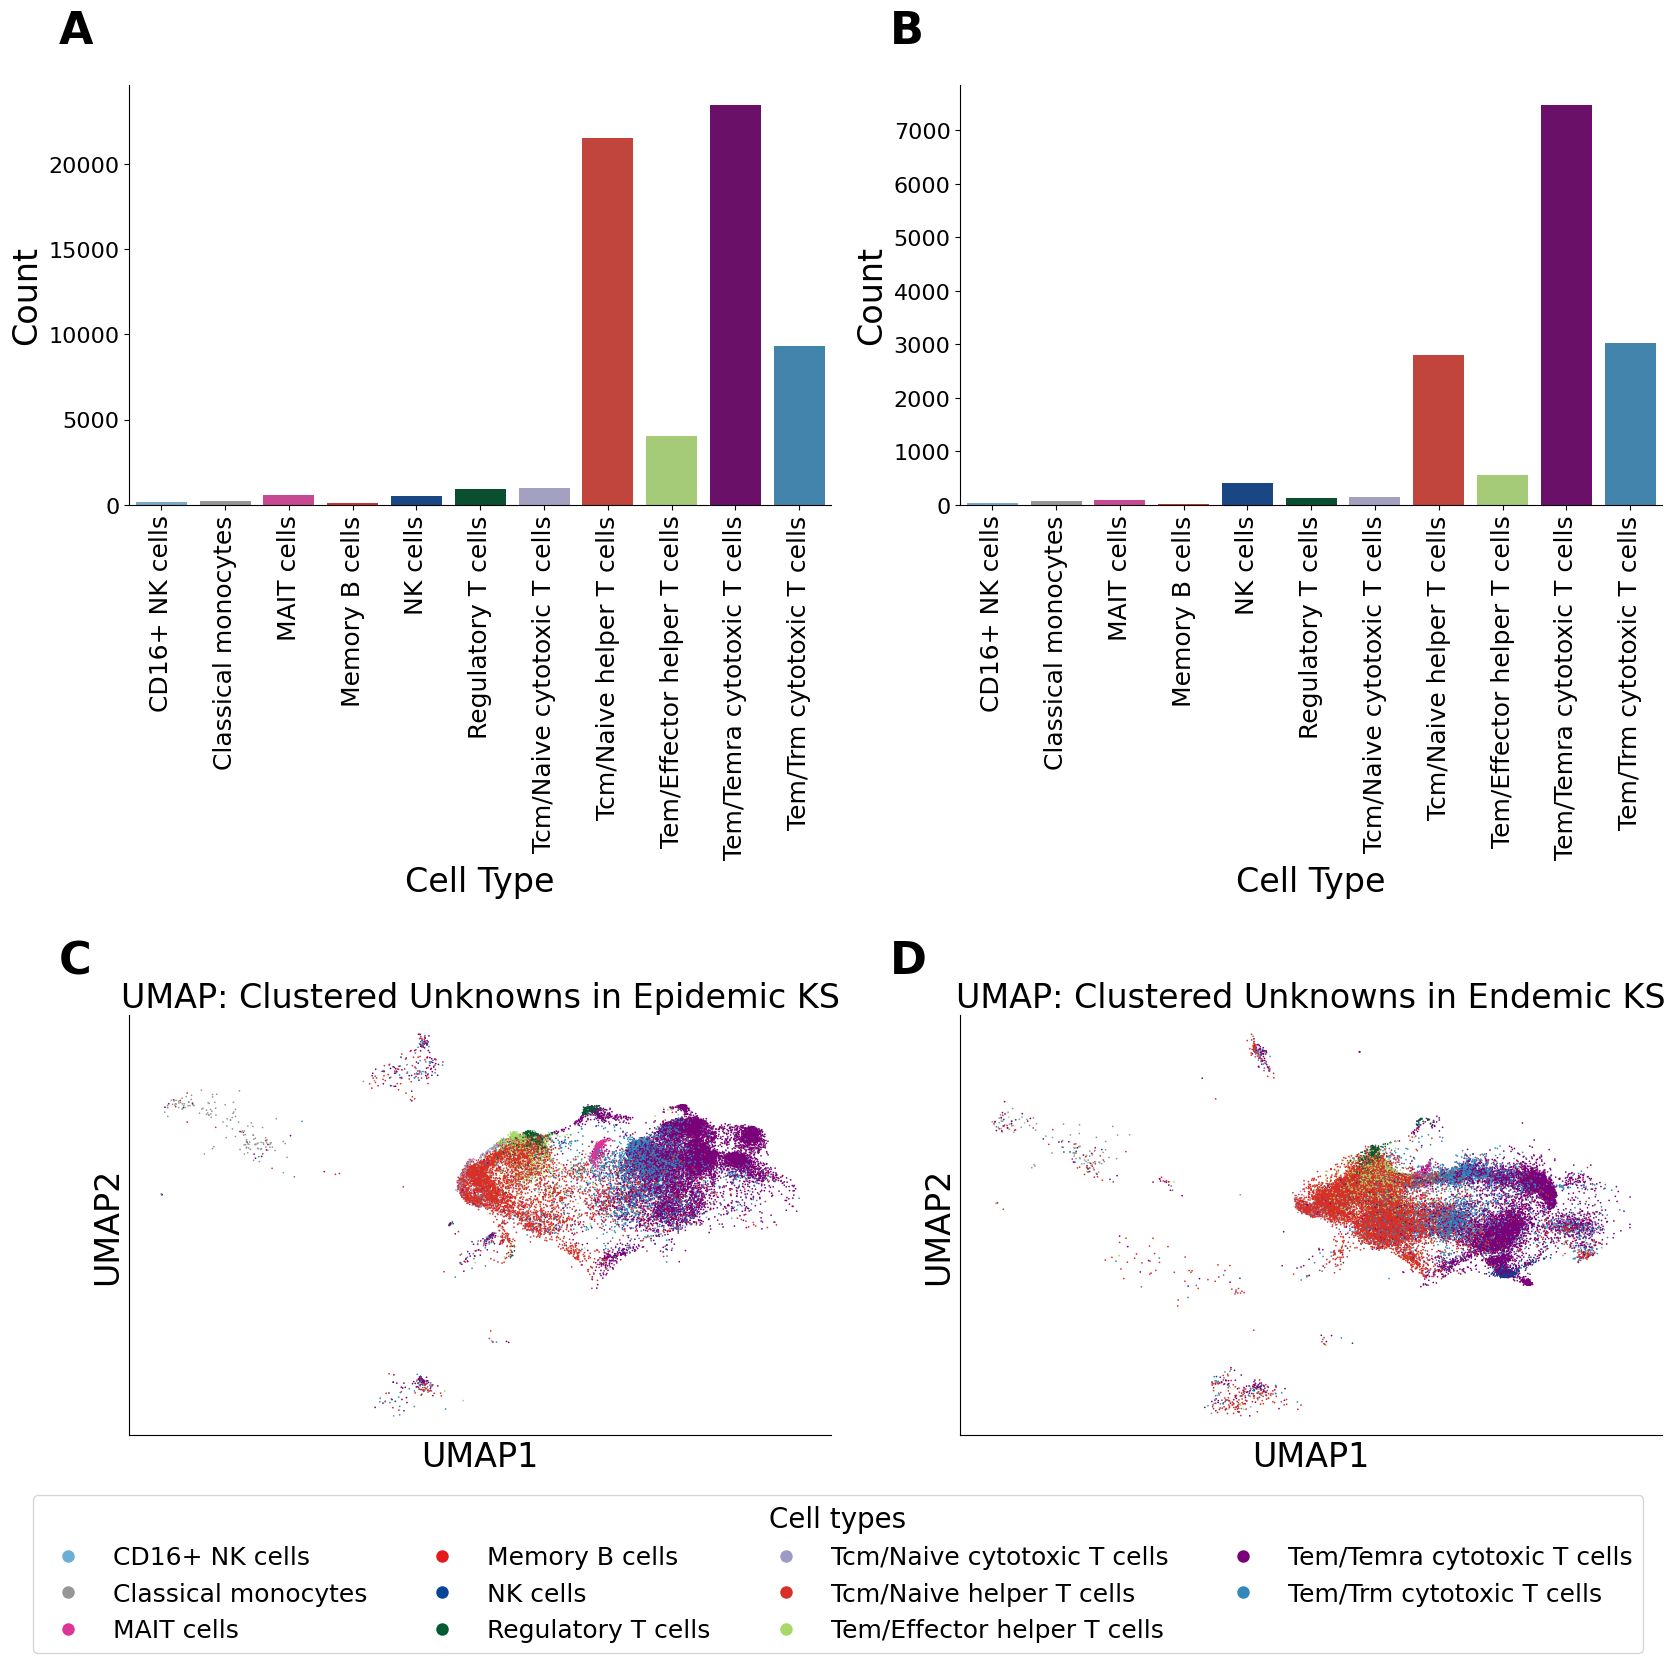

In [108]:

# Define a discrete palette for 11 categories
# Define a discrete palette for 11 categories
colors = ['#7a0177', '#3288bd', '#d73027', '#a6d96a', '#9e9ac8', '#005a32', 
          '#dd3497', '#084594', '#969696', '#6baed6', '#e41a1c']

palette = OrderedDict(zip(adata.obs['majority_voting'].unique().tolist(), colors))
palette_values = list(palette.values())

# Set global font size
plt.rcParams.update({'font.size': 16})  # Increased by 4 points from default (~10)

# Create a grid of 2x2 plots
fig, axs = plt.subplots(2, 2, figsize=(17, 17))

# Add subplot labels
subplot_labels = ['A', 'B', 'C', 'D']

# Plot 1: Bar graph for value_counts
sns.barplot(ax=axs[0, 0], x=value_counts.index, y=value_counts.values, palette=palette)
axs[0, 0].set_xlabel('Cell Type', fontsize=24)
axs[0, 0].set_ylabel('Count', fontsize=24)
axs[0, 0].tick_params(axis='x', rotation=90, labelsize=18)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].text(-0.1, 1.1, 'A', transform=axs[0, 0].transAxes, fontsize=32, fontweight='bold')

# Plot 2: Bar graph for value_counts_two
sns.barplot(ax=axs[0, 1], x=value_counts_two.index, y=value_counts_two.values, palette=palette)
axs[0, 1].set_xlabel('Cell Type', fontsize=24)
axs[0, 1].set_ylabel('Count', fontsize=24)
axs[0, 1].tick_params(axis='x', rotation=90, labelsize=18)
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].text(-0.1, 1.1, 'B', transform=axs[0, 1].transAxes, fontsize=32, fontweight='bold')

# Plot 3: UMAP for Epidemic KS
sc.pl.umap(adata[adata.obs['cohort'] == "Epidemic KS"], color=['majority_voting'], size = 6, palette=palette, ax=axs[1, 0], show=False, legend_loc='none')
axs[1, 0].set_title('UMAP: Clustered Unknowns in Epidemic KS', fontsize=24)
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].text(-0.1, 1.1, 'C', transform=axs[1, 0].transAxes, fontsize=32, fontweight='bold')
axs[1, 0].set_xlabel('UMAP1', fontsize=24)
axs[1, 0].set_ylabel('UMAP2', fontsize=24)

# Plot 4: UMAP for Endemic KS
sc.pl.umap(adata[adata.obs['cohort'] == "Endemic KS"], color=['majority_voting'], size = 6, palette=palette, ax=axs[1, 1], show=False, legend_loc='none')
axs[1, 1].set_title('UMAP: Clustered Unknowns in Endemic KS', fontsize=24)
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].text(-0.1, 1.1, 'D', transform=axs[1, 1].transAxes, fontsize=32, fontweight='bold')
axs[1, 1].set_xlabel('UMAP1', fontsize=24)
axs[1, 1].set_ylabel('UMAP2', fontsize=24)
# Create a single legend
legend_labels = adata.obs['majority_voting'].cat.categories  # Assuming it's a categorical variable
legend_patches = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[label], markersize=10, label=label)
    for label in legend_labels
]

fig.legend(handles=legend_patches, loc='lower center', ncol=4, fontsize=18, title="Cell types", title_fontsize=20)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space for the legend at the bottom

# Display the grid of plots
plt.savefig("ksrevision/figures/pdf/Figure_six.pdf", format="pdf", bbox_inches="tight")


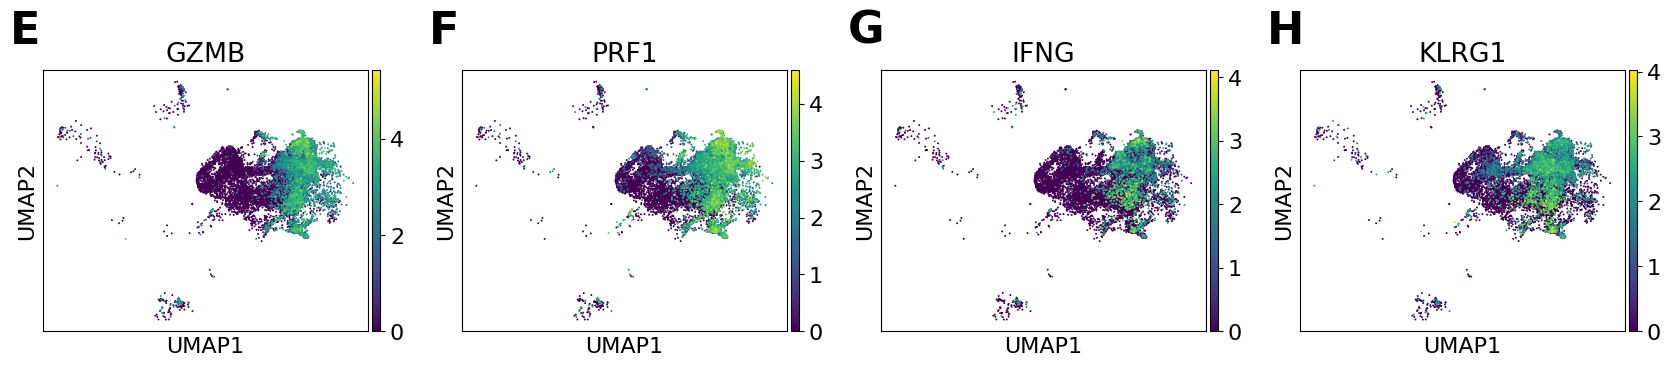

In [ ]:
import matplotlib.pyplot as plt
import scanpy as sc

# Create a figure and axes for a 2x2 grid of plots
fig, axs = plt.subplots(1, 4, figsize=(17, 4))

# List of genes and labels
genes = ['GZMB', 'PRF1', 'IFNG', 'KLRG1']
labels = ['E', 'F', 'G', 'H']

# Plot each UMAP on its respective subplot
for i, ax in enumerate(axs.flatten()):
    sc.pl.umap(
        adata[adata.obs['clustered_unknowns']],
        sort_order=True,
        color=genes[i],
        ax=ax,
        show=False,
        legend_loc='none'
    )
    # Add the letter label
    ax.text(-0.1, 1.1, labels[i], transform=ax.transAxes, fontsize=32, fontweight='bold')

# Adjust layout and display the figure
plt.tight_layout()
plt.savefig(f"Figure_six_third_row.pdf", format="pdf", bbox_inches="tight")
plt.show()
